# Loan Approval Prediction 

In [1]:
import pandas as pd
import numpy as np
import src.util as util
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
class LogisticRegression:

    def fit(self, x, y):
        '''
        Logistic model using Newthon's Method
        Args:
            X: Numpy array of training inputs. Shape(m, n)
            y: Numpy array of training labels. Shape(m,)
        '''
        m, n = x.shape
        self.theta = np.zeros(n)
        while True:
            theta_old = np.copy(self.theta)
            h = np.divide(1, (1 + np.exp(-(np.matmul(x, self.theta)))))
            gradient = (-1/m) * np.matmul(x.T, (y - h))
            h = np.reshape(h, (-1,1))
            hessian = (1/m) * np.dot(x.T, h * (1-h) * x)
            self.theta -= np.dot(np.linalg.inv(hessian), gradient)
            if np.linalg.norm(self.theta-theta_old, ord=1) < 1e-5:
                break
    
    def predict(self, x):
        """
        Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        return 1 / (1 + np.exp(-np.matmul(x, self.theta)))


In [3]:
def clean(X, theta):
    to = [i for i in range(len(theta)) if np.abs(theta[i]) < 1e-6]
    print(f'Columns removed: {to}')
    return np.delete(X, to, axis=1)

In [4]:
x, y = util.load_data('data/loan_approval_dataset.csv', add_intercept=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)    

/home/noble/Projects/loan_approval/src/util.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.read_csv(path).replace(dict)


Train data

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(np.round(y_pred) == y_test)
theta = model.theta
print(f'Accuracy: {accuracy}')
print(f'Weights: {model.theta}')


Accuracy: 0.9082747853239657
Weights: [-1.24067280e+01 -2.61303813e-03 -9.86134776e-02  2.50310256e-01
 -8.55713020e-07  1.82613376e-07 -1.70447727e-01  2.68677987e-02
  4.24679364e-10  2.94183532e-08  7.38413610e-08  4.92065070e-08]


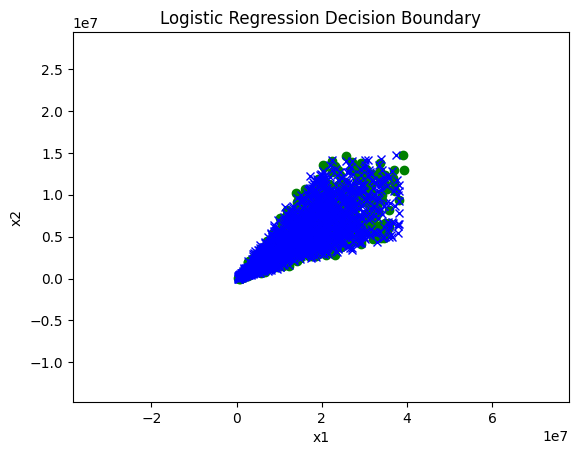

In [6]:
util.plot(x_test, y_test, model.theta)

In [7]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_train_pca = util.add_intercept(x_train_pca)
x_test_pca = pca.transform(x_test)
x_test_pca = util.add_intercept(x_test_pca)
model.fit(x_train_pca, y_train)
theta_pca = model.theta
y_pred = model.predict(x_test_pca)
accuracy = np.mean(np.round(y_pred) == y_test)
print(f'Weights after PCA: {model.theta}')
print(f'Accuracy after PCA: {accuracy}')

Weights after PCA: [ 5.54650456e-01 -3.35340856e-09  1.26831746e-08]
Accuracy after PCA: 0.6135831381733021


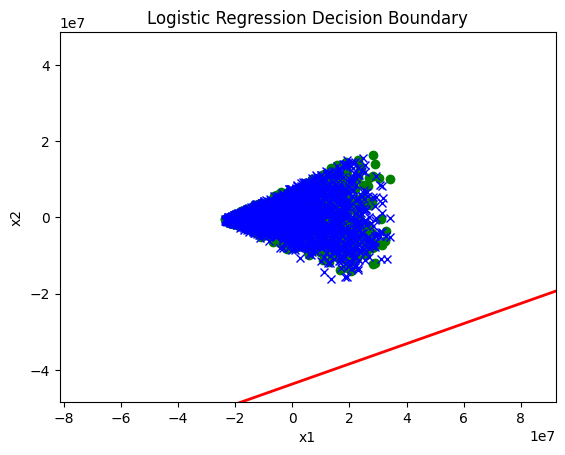

In [8]:
util.plot(x_test_pca, y_test, model.theta)

Clean the data foroutliers and train again

In [9]:
x = clean(x, theta)

Columns removed: [4, 5, 8, 9, 10, 11]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(np.round(y_pred) == y_test)
print(f'Accuracy after cleaning: {accuracy}')
print(f'Weights after cleaning: {model.theta}')

Accuracy after cleaning: 0.9106167056986729
Weights after cleaning: [-1.17425213e+01 -1.01552119e-02 -1.33315645e-01  2.10989297e-01
 -1.54986764e-01  2.53870988e-02]


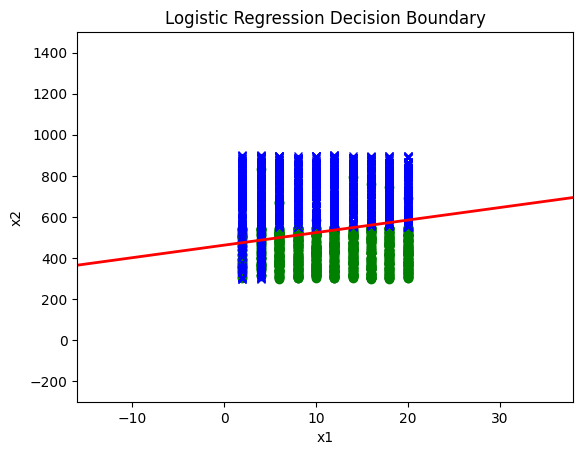

In [11]:
#Plot the decision boundary for the cleaned data
util.plot(x_test, y_test, model.theta)

Reduce dimensionality on cleaned data and train

In [12]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_train_pca = util.add_intercept(x_train_pca)
x_test_pca = pca.transform(x_test)
x_test_pca = util.add_intercept(x_test_pca)
model.fit(x_train_pca, y_train)
theta_pca = model.theta
y_pred = model.predict(x_test_pca)
accuracy = np.mean(np.round(y_pred) == y_test)
print(f'Weights after PCA: {model.theta}')
print(f'Accuracy after PCA: {accuracy}')

Weights after PCA: [ 1.95289983 -0.02526049 -0.15543483]
Accuracy after PCA: 0.9110070257611241


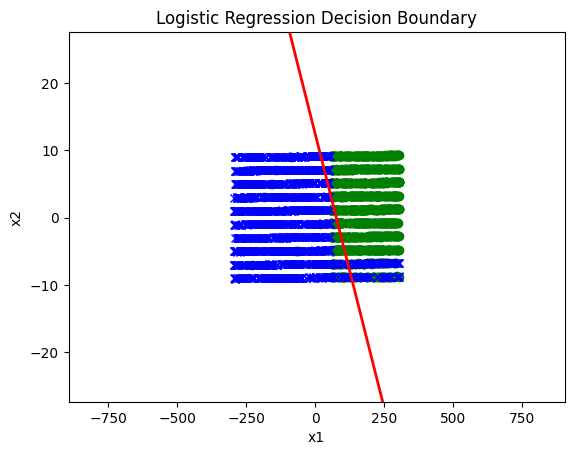

In [13]:
util.plot(x_test_pca, y_test, model.theta)